In [ ]:
import torch
import random
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
for word in words[:1]:
    for char, char1 in zip(word, word[1:]):
        print(char, char1)

e m
m m
m a


In [3]:
letters = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(letters)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [4]:

itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [9]:
N = torch.zeros((27,27), dtype=torch.int64)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [27]:
counts = {}
for word in words:
    w_start_end = '.' + word + '.'
    for char, char1 in zip(w_start_end, w_start_end[1:]):
        counts[(char, char1)] = counts.get((char, char1), 0) + 1

In [30]:
for pair, freq in counts.items():
    i_one = stoi[pair[0]]
    i_two = stoi[pair[1]]
    N[i_one, i_two] = freq
N

tensor([[ 556, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    2,  664,   41,  217,    1,  116,
          103,    0,    4,  105,   11,   76,  842,    8,    2,   45,    0,    3,
          104,   83,    0],
        [  97,  815,    3,   42,    1,  551,   25,    2,  664,  271,    3,  316,
          116,   31,  378,  380,    1,   11,   76,    5,   35,   35,   23,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,   14,    1,  424,   29,    4,   92,   17,   23,
         1070,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [32]:
p = N / N.sum()
p

tensor([[2.2417e-03, 1.7781e-02, 5.2657e-03, 6.2172e-03, 6.8139e-03, 6.1728e-03,
         1.6813e-03, 2.6973e-03, 3.5239e-03, 2.3829e-03, 9.7653e-03, 1.1947e-02,
         6.3381e-03, 1.0233e-02, 4.6206e-03, 1.5886e-03, 2.0764e-03, 3.7093e-04,
         6.6083e-03, 8.2856e-03, 5.2737e-03, 3.1449e-04, 1.5160e-03, 1.2378e-03,
         5.4027e-04, 2.1571e-03, 3.7456e-03],
        [2.6772e-02, 2.2417e-03, 2.1813e-03, 1.8950e-03, 4.2012e-03, 2.7901e-03,
         5.4027e-04, 6.7736e-04, 9.4024e-03, 6.6526e-03, 7.0558e-04, 2.2901e-03,
         1.0193e-02, 6.5881e-03, 2.1925e-02, 2.5401e-04, 3.3062e-04, 2.4191e-04,
         1.3160e-02, 4.5077e-03, 2.7699e-03, 1.5362e-03, 3.3626e-03, 6.4914e-04,
         7.3381e-04, 8.2654e-03, 1.7539e-03],
        [4.5964e-04, 1.2942e-03, 1.5321e-04, 4.0319e-06, 2.6207e-04, 2.6409e-03,
         8.0638e-06, 2.6772e-03, 1.6531e-04, 8.7492e-04, 4.0319e-06, 4.6770e-04,
         4.1529e-04, 0.0000e+00, 1.6128e-05, 4.2335e-04, 4.4351e-05, 3.0642e-04,
         3.3949e-

In [33]:
p.sum()

tensor(1.)

In [60]:
g = torch.Generator().manual_seed(2)
samples = torch.multinomial(p, 10, replacement=True, generator=g)
samples

tensor([[20,  1, 14, 11, 20, 11,  1,  4, 13, 10],
        [ 0, 14, 14, 18, 18,  8, 25,  1, 18,  0],
        [18, 18, 18, 17,  7,  4, 18,  0,  5,  7],
        [ 1,  1,  9,  5, 12,  5,  5, 15,  8,  1],
        [ 5,  0, 18, 12,  8,  9,  5,  5, 24,  1],
        [12,  0,  5, 12,  0, 14,  1, 12, 12, 18],
        [19,  6,  9,  9,  1,  4,  4,  9,  5, 18],
        [ 5, 11, 24,  8, 24, 20, 12, 15,  1, 17],
        [ 1,  1,  0,  9,  0, 11,  5,  1,  1, 24],
        [12, 14,  1, 13, 12, 12, 13, 14,  0, 14],
        [ 1,  1,  7,  5,  5, 15,  1,  0,  7,  1],
        [ 1, 21, 15,  1,  1,  1,  1, 24, 24,  0],
        [ 1,  9,  5,  1,  5,  1, 25, 25,  9,  9],
        [ 1,  1,  1, 24,  2,  1, 15,  5,  1,  1],
        [ 1,  9,  0,  0,  0,  1,  0, 26,  0,  0],
        [13, 14, 14, 19, 22, 14,  0, 12, 22, 14],
        [ 8,  8,  0, 16,  1,  1,  8,  1,  1,  8],
        [ 8, 14, 21, 14,  4, 24,  8,  8, 14,  8],
        [ 9,  0,  9, 18, 15,  0,  9, 18,  3,  9],
        [ 0,  1, 15,  0,  5,  5,  1, 21,  8,  1],


In [55]:
samples.size()

torch.Size([27, 1])

In [ ]:
word_lens = [len(w) for w in words]

In [85]:
N

tensor([[ 556, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    2,  664,   41,  217,    1,  116,
          103,    0,    4,  105,   11,   76,  842,    8,    2,   45,    0,    3,
          104,   83,    0],
        [  97,  815,    3,   42,    1,  551,   25,    2,  664,  271,    3,  316,
          116,   31,  378,  380,    1,   11,   76,    5,   35,   35,   23,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,   14,    1,  424,   29,    4,   92,   17,   23,
         1070,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [104]:
ones = torch.ones(4)
twos = torch.ones(4) * 2
test = torch.stack([ones, twos])
test, test.sum(dim=1, keepdim=True)

(tensor([[1., 1., 1., 1.],
         [2., 2., 2., 2.]]),
 tensor([[4.],
         [8.]]))

In [131]:
P = N.float()
P /= P.sum(dim=1, keepdim=True)
P[0].sum()

tensor(1.)

In [132]:
g = torch.Generator().manual_seed(2147483647)

words_to_gen = 20
for wi in range(words_to_gen):
    # word_len = torch.randint(min(word_lens), max(word_lens), (1,)).item()
    # for i in range(int(word_len)):
    li = 0
    next_letter = ''
    genned_word = '.'
    while next_letter != '.':
        prior_letter = genned_word[li]
        prior_letter_i = stoi[prior_letter]
        next_sample_p = P[prior_letter_i]
        next_letter_idx = torch.multinomial(
                next_sample_p, 1, replacement=True, generator=g
            ).item()
        next_letter = itos[next_letter_idx]
        genned_word += next_letter
        li += 1
    print(genned_word.strip('.'))

junide
janasah
p
cfqh
a
nn
kxi
ritolian
jgee
kxqhnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsushxdxossmitqn


In [142]:
n = 0
log_likelihood = 0
for word in words:
    w_start_end = '.' + word + '.'
    for char, char1 in zip(w_start_end, w_start_end[1:]):
        prob = P[stoi[char], stoi[char1]]
        log_likelihood += torch.log(prob)
        n += 1
        # print(f'{char}{char1}: {prob:.4f}')

print(f"neg log likelihood: {-log_likelihood}")
print(f"avg neg log likelhood: {-log_likelihood / n}")

neg log likelihood: 570686.625
avg neg log likelhood: 2.5014097690582275


In [151]:
#[char for char in w for w in words]
[f'{c}{c1}' for w in words for c, c1 in zip(f'.{w}.', f'.{w}.'[1:])]

['.e',
 'em',
 'mm',
 'ma',
 'a.',
 '.o',
 'ol',
 'li',
 'iv',
 'vi',
 'ia',
 'a.',
 '.a',
 'av',
 'va',
 'a.',
 '.i',
 'is',
 'sa',
 'ab',
 'be',
 'el',
 'll',
 'la',
 'a.',
 '.s',
 'so',
 'op',
 'ph',
 'hi',
 'ia',
 'a.',
 '.c',
 'ch',
 'ha',
 'ar',
 'rl',
 'lo',
 'ot',
 'tt',
 'te',
 'e.',
 '.m',
 'mi',
 'ia',
 'a.',
 '.a',
 'am',
 'me',
 'el',
 'li',
 'ia',
 'a.',
 '.h',
 'ha',
 'ar',
 'rp',
 'pe',
 'er',
 'r.',
 '.e',
 'ev',
 've',
 'el',
 'ly',
 'yn',
 'n.',
 '.a',
 'ab',
 'bi',
 'ig',
 'ga',
 'ai',
 'il',
 'l.',
 '.e',
 'em',
 'mi',
 'il',
 'ly',
 'y.',
 '.e',
 'el',
 'li',
 'iz',
 'za',
 'ab',
 'be',
 'et',
 'th',
 'h.',
 '.m',
 'mi',
 'il',
 'la',
 'a.',
 '.e',
 'el',
 'll',
 'la',
 'a.',
 '.a',
 'av',
 've',
 'er',
 'ry',
 'y.',
 '.s',
 'so',
 'of',
 'fi',
 'ia',
 'a.',
 '.c',
 'ca',
 'am',
 'mi',
 'il',
 'la',
 'a.',
 '.a',
 'ar',
 'ri',
 'ia',
 'a.',
 '.s',
 'sc',
 'ca',
 'ar',
 'rl',
 'le',
 'et',
 'tt',
 't.',
 '.v',
 'vi',
 'ic',
 'ct',
 'to',
 'or',
 'ri',
 'ia',
 'a.',

In [211]:
word_pairs = torch.tensor(
    [[stoi[c], stoi[c1]] for w in words for c, c1 in zip(f'.{w}.', f'.{w}.'[1:])]
).float()
word_pairs
# xs = torch.tensor(xs).float()
# xs[:20]

tensor([[ 0.,  5.],
        [ 5., 13.],
        [13., 13.],
        ...,
        [25., 26.],
        [26., 24.],
        [24.,  0.]])

In [218]:
xs = word_pairs[:,:1]
ys = word_pairs[:,1:]
xs,ys

(tensor([[ 0.],
         [ 5.],
         [13.],
         ...,
         [25.],
         [26.],
         [24.]]),
 tensor([[ 5.],
         [13.],
         [13.],
         ...,
         [26.],
         [24.],
         [ 0.]]))

In [ ]:
hidden_neurons = 100
predictable_chars = len(letters) + 1

model = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, predictable_chars),
    torch.nn.Softmax()
)

In [225]:
test_preds = model(xs)
test_preds.shape, test_preds

/home/daynil/mambaforge-pypy3/envs/ai-base/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


(torch.Size([228146, 27]),
 tensor([[3.6331e-02, 4.2283e-02, 2.6865e-02,  ..., 6.9518e-02, 4.0645e-02,
          4.6356e-02],
         [1.2353e-02, 2.9820e-02, 1.5131e-02,  ..., 5.5166e-03, 5.5027e-02,
          1.0606e-01],
         [3.1652e-04, 4.7240e-03, 6.8943e-04,  ..., 1.7975e-05, 7.4913e-03,
          1.3982e-01],
         ...,
         [5.3601e-07, 1.3013e-04, 2.6604e-06,  ..., 1.3688e-09, 1.5724e-04,
          9.4873e-02],
         [3.1181e-07, 9.5391e-05, 1.6579e-06,  ..., 6.1497e-10, 1.1272e-04,
          9.0825e-02],
         [9.2065e-07, 1.7737e-04, 4.2655e-06,  ..., 3.0443e-09, 2.1915e-04,
          9.9017e-02]], grad_fn=<SoftmaxBackward0>))

In [228]:
test_preds[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [233]:
test_preds[0].max(), test_preds[0]

(tensor(0.0695, grad_fn=<MaxBackward1>),
 tensor([0.0363, 0.0423, 0.0269, 0.0517, 0.0351, 0.0348, 0.0326, 0.0354, 0.0337,
         0.0281, 0.0306, 0.0683, 0.0330, 0.0371, 0.0187, 0.0365, 0.0233, 0.0478,
         0.0226, 0.0310, 0.0381, 0.0333, 0.0393, 0.0270, 0.0695, 0.0406, 0.0464],
        grad_fn=<SelectBackward0>))

In [231]:
test_preds[0].argmax()

tensor(24)

In [236]:
test_preds[0].max()

tensor(0.0695, grad_fn=<MaxBackward1>)

In [239]:
test_preds.max(dim=1)

torch.return_types.max(
values=tensor([0.0695, 0.2577, 0.5700,  ..., 0.7608, 0.7715, 0.7496],
       grad_fn=<MaxBackward0>),
indices=tensor([24, 11, 11,  ..., 11, 11, 11]))

In [229]:
test_preds.shape[0]

228146

In [240]:
def loss_fn(preds: torch.Tensor):
    return (-torch.log(preds.max(dim=1).values).sum()) / test_preds.shape[0]

In [241]:
loss_fn(test_preds)

tensor(1.2578, grad_fn=<DivBackward0>)

In [205]:
test_preds[0]

tensor([0.0219, 0.0348, 0.0533, 0.0416, 0.0252, 0.0760, 0.0333, 0.0720, 0.0300,
        0.0654, 0.0357, 0.0850, 0.0332, 0.0318, 0.0059, 0.0129, 0.0217, 0.0211,
        0.0780, 0.0352, 0.0114, 0.0077, 0.0165, 0.0219, 0.0156, 0.0724, 0.0403],
       grad_fn=<SelectBackward0>)

In [254]:
hidden_neurons = 100
predictable_chars = len(letters) + 1

epochs = 10
lr = 0.2

model = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, predictable_chars),
    torch.nn.Softmax()
)

optimizer = torch.optim.SGD(model.parameters(), lr)

def train_step(xb):
    preds = model(xb)
    loss = loss_fn(preds)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss

def valid_step(xb):
    preds = model(xb)
    loss = loss_fn(preds)
    return loss

for epoch in range(epochs):
    model.train()
    loss = train_step(xs)
    print(loss)
    # for batch in dls.train:
    #     xb, yb = batch
    #     xb = to_bw_flattened(xb)
    #     xb, yb = to_torch_tensor(xb, yb)
    #     loss, acc = train_step(xb, yb)

    # print(f"Avg loss: {tot_loss / valid_batches}, Avg acc: {tot_acc / valid_batches}")

tensor(1.2794, grad_fn=<DivBackward0>)
tensor(0.0179, grad_fn=<DivBackward0>)
tensor(0.0165, grad_fn=<DivBackward0>)
tensor(0.0154, grad_fn=<DivBackward0>)
tensor(0.0143, grad_fn=<DivBackward0>)
tensor(0.0134, grad_fn=<DivBackward0>)
tensor(0.0126, grad_fn=<DivBackward0>)
tensor(0.0119, grad_fn=<DivBackward0>)
tensor(0.0113, grad_fn=<DivBackward0>)
tensor(0.0107, grad_fn=<DivBackward0>)


Thinking about it, the above is actually wrong because what I'm calculating loss on doesn't make sense. I'm basically giving it the first letter, then calculating loss on the confidence of whatever it predicts as the second.

What I need to do is cross entropy loss - give it the xs and the labels, and calculate cross entropy loss on them.

In [256]:
xs, ys

(tensor([[ 0.],
         [ 5.],
         [13.],
         ...,
         [25.],
         [26.],
         [24.]]),
 tensor([[ 5.],
         [13.],
         [13.],
         ...,
         [26.],
         [24.],
         [ 0.]]))

In [257]:
loss_fn = torch.nn.CrossEntropyLoss()

In [262]:
xs, ys.squeeze()

(tensor([[ 0.],
         [ 5.],
         [13.],
         ...,
         [25.],
         [26.],
         [24.]]),
 tensor([ 5., 13., 13.,  ..., 26., 24.,  0.]))

In [324]:
import torch.nn.functional as F

In [335]:
xs.int()

tensor([[ 0],
        [ 5],
        [13],
        ...,
        [25],
        [26],
        [24]], dtype=torch.int32)

In [330]:
xs.to(torch.int64).squeeze()

tensor([ 0,  5, 13,  ..., 25, 26, 24], dtype=torch.int32)

In [338]:
ys.to(torch.int64).squeeze()

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [337]:
F.one_hot(xs.squeeze().to(torch.int64), 27)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 1, 0, 0]])

In [339]:
F.one_hot(ys.squeeze().to(torch.int64), 27)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])

In [355]:
hidden_neurons = 100
predictable_chars = len(letters) + 1

epochs = 50
lr = 3

model = torch.nn.Sequential(
    torch.nn.Linear(27, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, predictable_chars),
    # cross entropy loss expects raw unnormalized logits
    # torch.nn.Softmax()
)

optimizer = torch.optim.SGD(model.parameters(), lr)

def train_step(xb, yb):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss

# def valid_step(xb):
#     preds = model(xb)
#     loss = loss_fn(preds)
#     return loss

for epoch in range(epochs):
    model.train()
    loss = train_step(
        F.one_hot(xs.squeeze().to(torch.int64), 27).float(), 
        F.one_hot(ys.squeeze().to(torch.int64), 27).float()
    )
    print(loss)
    # for batch in dls.train:
    #     xb, yb = batch
    #     xb = to_bw_flattened(xb)
    #     xb, yb = to_torch_tensor(xb, yb)
    #     loss, acc = train_step(xb, yb)

    # print(f"Avg loss: {tot_loss / valid_batches}, Avg acc: {tot_acc / valid_batches}")

tensor(3.3066, grad_fn=<DivBackward1>)
tensor(3.0894, grad_fn=<DivBackward1>)
tensor(2.9425, grad_fn=<DivBackward1>)
tensor(2.8668, grad_fn=<DivBackward1>)
tensor(2.8288, grad_fn=<DivBackward1>)
tensor(2.8046, grad_fn=<DivBackward1>)
tensor(2.7865, grad_fn=<DivBackward1>)
tensor(2.7711, grad_fn=<DivBackward1>)
tensor(2.7569, grad_fn=<DivBackward1>)
tensor(2.7435, grad_fn=<DivBackward1>)
tensor(2.7306, grad_fn=<DivBackward1>)
tensor(2.7179, grad_fn=<DivBackward1>)
tensor(2.7058, grad_fn=<DivBackward1>)
tensor(2.6938, grad_fn=<DivBackward1>)
tensor(2.6828, grad_fn=<DivBackward1>)
tensor(2.6719, grad_fn=<DivBackward1>)
tensor(2.6621, grad_fn=<DivBackward1>)
tensor(2.6541, grad_fn=<DivBackward1>)
tensor(2.6500, grad_fn=<DivBackward1>)
tensor(2.6603, grad_fn=<DivBackward1>)
tensor(2.7022, grad_fn=<DivBackward1>)
tensor(2.7783, grad_fn=<DivBackward1>)
tensor(2.7740, grad_fn=<DivBackward1>)
tensor(2.6420, grad_fn=<DivBackward1>)
tensor(2.6152, grad_fn=<DivBackward1>)
tensor(2.6088, grad_fn=<D

In [356]:
letter_a = torch.zeros(27)
letter_a[1] = 1
single_pred_logits = model(letter_a)
single_pred_logits

tensor([ 2.6328, -0.0816, -0.4266, -0.3451,  0.4298,  0.1665, -1.5470, -1.0255,
         1.2468,  0.7366, -1.3115, -0.2626,  1.4293,  0.8547,  2.3013, -0.5743,
        -1.5736, -2.0400,  1.6903,  0.7525,  0.2714, -0.3738,  0.0182, -1.4725,
        -1.6215,  1.0940, -0.5529], grad_fn=<ViewBackward0>)

In [357]:
single_pred = torch.nn.Softmax()(single_pred_logits)
single_pred.argmax(dim=0)
# itos[single_pred.argmax().item()]

/home/daynil/mambaforge-pypy3/envs/ai-base/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(0)

In [364]:
g = torch.Generator().manual_seed(2147483647)

words_to_gen = 20
for wi in range(words_to_gen):
    # word_len = torch.randint(min(word_lens), max(word_lens), (1,)).item()
    # for i in range(int(word_len)):
    li = 0
    next_letter = ''
    genned_word = '.'
    while next_letter != '.' and len(genned_word) < max(word_lens):
        prior_letter = genned_word[li]
        prior_letter_i = stoi[prior_letter]
        prior_letter_i_one_hot = F.one_hot(
            torch.tensor(prior_letter_i), 27
        ).float()

        probs = torch.nn.Softmax()(model(prior_letter_i_one_hot))
        pred = torch.multinomial(probs, 1, replacement=True).item()
        next_letter = itos[int(pred)]

        # next_sample_p = P[prior_letter_i]
        # next_letter_idx = torch.multinomial(
        #         next_sample_p, 1, replacement=True, generator=g
        #     ).item()
        # next_letter = itos[next_letter_idx]
        genned_word += next_letter
        li += 1
    print(genned_word.strip('.'))

keen
aely
droma
lien

b
miacun
ble
crtya
kin
lhrinnyledel
wesadalauhaon
gevesch
pmilipnren
anlealtisn
com
dllslefsi
tant
ryi
san


Karpathy:
Update: I added some suggested exercises to the description of the video. imo learning requires in-person tinkering and work, watching a video is not enough. If you complete the exercises please feel free to link your work here. (+Feel free to suggest other good exercises!)

E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

E06: meta-exercise! Think of a fun/interesting exercise and complete it.

### train a trigram language model
E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

First, we need to create a new vocab. The neural net wouldn't know what to do with 2 letters passed individually - we can't one hot encode 2 different answers. So to create a trigram, we create a vocab of all possible 2 letter combos with indices.

Note that we have to generate this from the alphabet rather than the vocab since we may come up with novel word pairs that didn't exist in the original dataset.

In [411]:
letters + ['.']

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '.']

In [414]:
pairs = []
for l in letters + ['.']:
    for l2 in letters + ['.']:
        pair = l + l2
        pairs.append(pair)

pairs = sorted(pairs)
ptoi = {p:i for i, p in enumerate(pairs)}
ptoi

{'..': 0,
 '.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'a.': 27,
 'aa': 28,
 'ab': 29,
 'ac': 30,
 'ad': 31,
 'ae': 32,
 'af': 33,
 'ag': 34,
 'ah': 35,
 'ai': 36,
 'aj': 37,
 'ak': 38,
 'al': 39,
 'am': 40,
 'an': 41,
 'ao': 42,
 'ap': 43,
 'aq': 44,
 'ar': 45,
 'as': 46,
 'at': 47,
 'au': 48,
 'av': 49,
 'aw': 50,
 'ax': 51,
 'ay': 52,
 'az': 53,
 'b.': 54,
 'ba': 55,
 'bb': 56,
 'bc': 57,
 'bd': 58,
 'be': 59,
 'bf': 60,
 'bg': 61,
 'bh': 62,
 'bi': 63,
 'bj': 64,
 'bk': 65,
 'bl': 66,
 'bm': 67,
 'bn': 68,
 'bo': 69,
 'bp': 70,
 'bq': 71,
 'br': 72,
 'bs': 73,
 'bt': 74,
 'bu': 75,
 'bv': 76,
 'bw': 77,
 'bx': 78,
 'by': 79,
 'bz': 80,
 'c.': 81,
 'ca': 82,
 'cb': 83,
 'cc': 84,
 'cd': 85,
 'ce': 86,
 'cf': 87,
 'cg': 88,
 'ch': 89,
 'ci': 90,
 'cj': 91

In [415]:
itop = {i:p for p, i in ptoi.items()}
itop

{0: '..',
 1: '.a',
 2: '.b',
 3: '.c',
 4: '.d',
 5: '.e',
 6: '.f',
 7: '.g',
 8: '.h',
 9: '.i',
 10: '.j',
 11: '.k',
 12: '.l',
 13: '.m',
 14: '.n',
 15: '.o',
 16: '.p',
 17: '.q',
 18: '.r',
 19: '.s',
 20: '.t',
 21: '.u',
 22: '.v',
 23: '.w',
 24: '.x',
 25: '.y',
 26: '.z',
 27: 'a.',
 28: 'aa',
 29: 'ab',
 30: 'ac',
 31: 'ad',
 32: 'ae',
 33: 'af',
 34: 'ag',
 35: 'ah',
 36: 'ai',
 37: 'aj',
 38: 'ak',
 39: 'al',
 40: 'am',
 41: 'an',
 42: 'ao',
 43: 'ap',
 44: 'aq',
 45: 'ar',
 46: 'as',
 47: 'at',
 48: 'au',
 49: 'av',
 50: 'aw',
 51: 'ax',
 52: 'ay',
 53: 'az',
 54: 'b.',
 55: 'ba',
 56: 'bb',
 57: 'bc',
 58: 'bd',
 59: 'be',
 60: 'bf',
 61: 'bg',
 62: 'bh',
 63: 'bi',
 64: 'bj',
 65: 'bk',
 66: 'bl',
 67: 'bm',
 68: 'bn',
 69: 'bo',
 70: 'bp',
 71: 'bq',
 72: 'br',
 73: 'bs',
 74: 'bt',
 75: 'bu',
 76: 'bv',
 77: 'bw',
 78: 'bx',
 79: 'by',
 80: 'bz',
 81: 'c.',
 82: 'ca',
 83: 'cb',
 84: 'cc',
 85: 'cd',
 86: 'ce',
 87: 'cf',
 88: 'cg',
 89: 'ch',
 90: 'ci',
 91: 'cj'

In [416]:
len(ptoi)

729

In [424]:
xs = []
ys = []
for w in words:
    wdot = f'.{w}.'
    for i in range(len(wdot) - 2):
        pair = wdot[i] + wdot[i+1]
        xs.append(ptoi[pair])
        ys.append(stoi[wdot[i+2]])

xs, ys

([5,
  148,
  364,
  352,
  15,
  417,
  333,
  265,
  603,
  244,
  1,
  49,
  595,
  9,
  262,
  514,
  29,
  59,
  147,
  336,
  325,
  19,
  528,
  421,
  440,
  225,
  244,
  3,
  89,
  217,
  45,
  498,
  339,
  425,
  560,
  545,
  13,
  360,
  244,
  1,
  40,
  356,
  147,
  333,
  244,
  8,
  217,
  45,
  502,
  437,
  153,
  5,
  157,
  599,
  147,
  349,
  689,
  1,
  29,
  63,
  250,
  190,
  36,
  255,
  5,
  148,
  360,
  255,
  349,
  5,
  147,
  333,
  269,
  703,
  29,
  59,
  155,
  548,
  13,
  360,
  255,
  325,
  5,
  147,
  336,
  325,
  1,
  49,
  599,
  153,
  511,
  19,
  528,
  411,
  171,
  244,
  3,
  82,
  40,
  360,
  255,
  325,
  1,
  45,
  495,
  244,
  19,
  516,
  82,
  45,
  498,
  329,
  155,
  560,
  22,
  603,
  246,
  101,
  555,
  423,
  495,
  244,
  13,
  352,
  31,
  117,
  262,
  528,
  419,
  12,
  345,
  581,
  379,
  7,
  207,
  487,
  30,
  86,
  3,
  89,
  228,
  339,
  410,
  16,
  437,
  149,
  383,
  147,
  339,
  421,
  437,
  12,
 

In [425]:
xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()

In [437]:
hidden_neurons = 100
predictable_chars = len(letters) + 1
total_pairs = len(ptoi)

epochs = 100
lr = 3

model = torch.nn.Sequential(
    torch.nn.Linear(total_pairs, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, predictable_chars),
)

optimizer = torch.optim.SGD(model.parameters(), lr, weight_decay=0.01)

def train_step(xb, yb):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss

# def valid_step(xb):
#     preds = model(xb)
#     loss = loss_fn(preds)
#     return loss

for epoch in range(epochs):
    model.train()
    loss = train_step(
        F.one_hot(xs.to(torch.int64), total_pairs).float(), 
        F.one_hot(ys.to(torch.int64), predictable_chars).float()
    )
    print(loss)
    # for batch in dls.train:
    #     xb, yb = batch
    #     xb = to_bw_flattened(xb)
    #     xb, yb = to_torch_tensor(xb, yb)
    #     loss, acc = train_step(xb, yb)

    # print(f"Avg loss: {tot_loss / valid_batches}, Avg acc: {tot_acc / valid_batches}")

tensor(3.3091, grad_fn=<DivBackward1>)
tensor(3.1411, grad_fn=<DivBackward1>)
tensor(3.0107, grad_fn=<DivBackward1>)
tensor(2.9063, grad_fn=<DivBackward1>)
tensor(2.8301, grad_fn=<DivBackward1>)
tensor(2.7835, grad_fn=<DivBackward1>)
tensor(2.7566, grad_fn=<DivBackward1>)
tensor(2.7404, grad_fn=<DivBackward1>)
tensor(2.7300, grad_fn=<DivBackward1>)
tensor(2.7231, grad_fn=<DivBackward1>)
tensor(2.7183, grad_fn=<DivBackward1>)
tensor(2.7148, grad_fn=<DivBackward1>)
tensor(2.7121, grad_fn=<DivBackward1>)
tensor(2.7101, grad_fn=<DivBackward1>)
tensor(2.7084, grad_fn=<DivBackward1>)
tensor(2.7071, grad_fn=<DivBackward1>)
tensor(2.7059, grad_fn=<DivBackward1>)
tensor(2.7050, grad_fn=<DivBackward1>)
tensor(2.7041, grad_fn=<DivBackward1>)
tensor(2.7034, grad_fn=<DivBackward1>)
tensor(2.7027, grad_fn=<DivBackward1>)
tensor(2.7021, grad_fn=<DivBackward1>)
tensor(2.7015, grad_fn=<DivBackward1>)
tensor(2.7010, grad_fn=<DivBackward1>)
tensor(2.7004, grad_fn=<DivBackward1>)
tensor(2.6999, grad_fn=<D

KeyboardInterrupt: 

In [421]:
starters = [p for p in pairs if p[0] == '.' and p != '..']
starters

['.a',
 '.b',
 '.c',
 '.d',
 '.e',
 '.f',
 '.g',
 '.h',
 '.i',
 '.j',
 '.k',
 '.l',
 '.m',
 '.n',
 '.o',
 '.p',
 '.q',
 '.r',
 '.s',
 '.t',
 '.u',
 '.v',
 '.w',
 '.x',
 '.y',
 '.z']

In [402]:
import random

In [440]:
g = torch.Generator().manual_seed(2147483647)

words_to_gen = 20
for wi in range(words_to_gen):
    # word_len = torch.randint(min(word_lens), max(word_lens), (1,)).item()
    # for i in range(int(word_len)):
    li = 0
    next_letter = ''
    # e.g. ".a"
    genned_word = starters[random.randint(0, len(starters) - 1)]
    while next_letter != '.' and len(genned_word) < max(word_lens):
        prior_pair = genned_word[li] + genned_word[li+1]
        prior_pair_i = ptoi[prior_pair]
        prior_pair_i_one_hot = F.one_hot(
            torch.tensor(prior_pair_i), total_pairs
        ).float()

        probs = torch.nn.Softmax()(model(prior_pair_i_one_hot))
        pred = torch.multinomial(probs, 1, replacement=True).item()
        next_letter = itos[int(pred)]

        # next_sample_p = P[prior_letter_i]
        # next_letter_idx = torch.multinomial(
        #         next_sample_p, 1, replacement=True, generator=g
        #     ).item()
        # next_letter = itos[next_letter_idx]
        genned_word += next_letter
        li += 1
    print(genned_word.strip('.'))

xeeoimoavnbask
kl
bwa
hahihgalf
badjapnilen
gaaitnaue
vuhyiarngya
wdainadiabturs
kslmyianeauhla
msnvoinennerga
keahmceavaptay
cyxoeseiarasan
fcllua
kreeanneqneaaa
ee
heai
llayzaf
mrylaxlnonlt
eeeayro
keaelnnha


### Data Test Split

E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [484]:
from torch.utils.data import Dataset, DataLoader, random_split

In [530]:
class WordsDataset(Dataset):
    def __init__(self, words_file_dir):
        self.words_file_dir = words_file_dir
        self.words = open(words_file_dir).read().splitlines()
        
        xs = []
        ys = []
        for w in self.words:
            wdot = f'.{w}.'
            for i in range(len(wdot) - 2):
                pair = wdot[i] + wdot[i+1]
                xs.append(ptoi[pair])
                ys.append(stoi[wdot[i+2]])

        self.xs = torch.tensor(xs)
        self.ys = torch.tensor(ys)

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, idx):
        # return F.one_hot(self.xs[idx], total_pairs).float(), F.one_hot(self.ys[idx], predictable_chars).float()
        return F.one_hot(self.xs[idx], total_pairs).float(), self.ys[idx]

In [531]:
full_data = WordsDataset('names.txt')
train_data, dev_data, test_data = torch.utils.data.random_split(
    full_data, [0.8, 0.1, 0.1]
)
len(train_data), len(dev_data), len(test_data)

(156891, 19611, 19611)

In [532]:
train_dl = DataLoader(train_data, batch_size=256, shuffle=True)
dev_dl = DataLoader(dev_data, batch_size=256, shuffle=True)
test_dl = DataLoader(test_data, batch_size=256, shuffle=True)

In [553]:
hidden_neurons = 100
predictable_chars = len(letters) + 1
total_pairs = len(ptoi)

epochs = 20
lr = 0.9

model = torch.nn.Sequential(
    torch.nn.Linear(total_pairs, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, predictable_chars),
)

optimizer = torch.optim.SGD(model.parameters(), lr, weight_decay=0.00001)

def train_step(xb, yb):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss

def valid_step(xb, yb):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    return loss

for epoch in range(epochs):
    model.train()
    tot_train_loss = 0
    for batch in train_dl:
        xb, yb = batch
        loss = train_step(xb, yb)
        tot_train_loss += loss.item()

    model.eval()
    tot_dev_loss = 0
    with torch.inference_mode():
        for batch in dev_dl:
            xb, yb = batch
            loss = valid_step(xb, yb)
            tot_dev_loss += loss.item()
    
    print(f"Epoch: {epoch+1}; Train loss: {tot_train_loss / len(train_dl)}; Valid loss: {tot_dev_loss / len(dev_dl)}")

model.eval()
tot_test_loss = 0
with torch.inference_mode():
    for batch in test_dl:
        xb, yb = batch
        loss = valid_step(xb, yb)
        tot_test_loss += loss.item()

print(f"Test loss: {tot_test_loss / len(test_dl)}")


Epoch: 1; Train loss: 2.478865760380059; Valid loss: 2.3297139112051433
Epoch: 2; Train loss: 2.240069600147291; Valid loss: 2.2234733507230686
Epoch: 3; Train loss: 2.1854187545729693; Valid loss: 2.195639046755704
Epoch: 4; Train loss: 2.1607985934075487; Valid loss: 2.176535850995547
Epoch: 5; Train loss: 2.146448504088559; Valid loss: 2.1770438095191857
Epoch: 6; Train loss: 2.1334736592228998; Valid loss: 2.1644874176421722
Epoch: 7; Train loss: 2.126377756599501; Valid loss: 2.158960958579918
Epoch: 8; Train loss: 2.11990780931507; Valid loss: 2.152849623135158
Epoch: 9; Train loss: 2.115403890609741; Valid loss: 2.1530039852315728
Epoch: 10; Train loss: 2.112162614335438; Valid loss: 2.163072694431652
Epoch: 11; Train loss: 2.108507923745409; Valid loss: 2.1507596567079617
Epoch: 12; Train loss: 2.1063981013430273; Valid loss: 2.164969112965968
Epoch: 13; Train loss: 2.1039171353055446; Valid loss: 2.1443202077568353
Epoch: 14; Train loss: 2.102816231682483; Valid loss: 2.143884

Test loss with 10 epochs:
* lr 0.5 and weight_decay 0.01 = 2.58
* lr 0.5 and weight_decay 0.05 = 2.76 (basically didn't train)
* lr 0.5 and weight_decay 0.005 = 2.44 (way better)
* lr 0.5 and weight_decay 0.001 = 2.16 (still improving)
* lr 0.5 and weight_decay 0.0001 = 2.15 (marginal gain)
* lr 0.5 and weight_decay 0.00001 = 2.13
* lr 0.5 and weight_decay 0.000001 = 2.13 (sticking with prior)
* lr 0.9 and weight_decay 0.00001 = 2.12 **best**
* lr 1.5 and weight_decay 0.00001 = 2.135 (starting to overfit? train was still going down)
* lr 1.5 and weight_decay 0.0001 = 2.130 (lower lr was better)

Test loss with 20 epochs at best settings:
2.12

In [556]:
g = torch.Generator().manual_seed(2147483647)

words_to_gen = 20
for wi in range(words_to_gen):
    li = 0
    next_letter = ''
    # e.g. ".a"
    genned_word = starters[random.randint(0, len(starters) - 1)]
    while next_letter != '.' and len(genned_word) < max(word_lens):
        prior_pair = genned_word[li] + genned_word[li+1]
        prior_pair_i = ptoi[prior_pair]
        prior_pair_i_one_hot = F.one_hot(
            torch.tensor(prior_pair_i), total_pairs
        ).float()

        probs = torch.nn.Softmax()(model(prior_pair_i_one_hot))
        pred = torch.multinomial(probs, 1, replacement=True).item()
        next_letter = itos[int(pred)]

        genned_word += next_letter
        li += 1
    print(genned_word.strip('.'))

ter
maxona
riazah
gus
ka
jaxlesh
arucrohermi
wa
bra
farielyn
dee
lukand
eli
kyn
nasi
jabenn
bramarsyra
araemai
kia
wilayzriyah


## Part 2

- Rebuild training set to take 3 letter inputs and predict next letter
    - Build using raw pytorch without their model (i.e. do own matrix multiplies, initialize own weights, etc make sure to call requires_grad=True)
    - Note, he includes "...", "..a", etc., so "." can occur more than once
    - Can I improve the model without these? Try after the rest is done.
- Create an embedding lookup table (he started with 2 dimensional embedding, one for each of the 27 characters, so was able to plot them before increasing embedding size)
- Create the full model based on the paper
    - He used cross entropy loss
    - Use mini batches (he started with batches of 32, and instead of partitioning them out evenly, just shuffled via torch.randint)
- Determine best learning rate (create pool of lrs from 0-1000 with torch.linspace, run training from lowest to highest training via batches, plot learn rate vs loss, best LR around where loss stops decreasing, and definitely before it explodes/starts increasing or being unstable)
- After training stops/slows down at optimal learning rate, try some learning rate decay to learn some more (decrease lr by factor of 10)
- Split into train/dev/test since we'll be tuning hyperparameters
- Once we've optimized our model on learning rate, we can try increasing the hidden layer size (he used 300) and train again, then try increasing embedding dimensions
- Try to beat his dev loss of 2.17 (or my prior one of 2.12 with the prior model)
- Read Paper Bengio et al. 2003 (MLP langauge model)

### Exercises

E01: Tune the hyperparameters of the training to beat my best validation loss of 2.2
E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?
E03: Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?

In [ ]:
letters + ['.']

In [13]:
letter_groups = []
for l in letters + ['.']:
    for l2 in letters + ['.']:
        for l3 in letters + ['.']:
            i = l + l2 + l3
            letter_groups.append(i)

letter_groups = sorted(letter_groups)
lgtoi = {p:i for i, p in enumerate(letter_groups)}
lgtoi

{'...': 0,
 '..a': 1,
 '..b': 2,
 '..c': 3,
 '..d': 4,
 '..e': 5,
 '..f': 6,
 '..g': 7,
 '..h': 8,
 '..i': 9,
 '..j': 10,
 '..k': 11,
 '..l': 12,
 '..m': 13,
 '..n': 14,
 '..o': 15,
 '..p': 16,
 '..q': 17,
 '..r': 18,
 '..s': 19,
 '..t': 20,
 '..u': 21,
 '..v': 22,
 '..w': 23,
 '..x': 24,
 '..y': 25,
 '..z': 26,
 '.a.': 27,
 '.aa': 28,
 '.ab': 29,
 '.ac': 30,
 '.ad': 31,
 '.ae': 32,
 '.af': 33,
 '.ag': 34,
 '.ah': 35,
 '.ai': 36,
 '.aj': 37,
 '.ak': 38,
 '.al': 39,
 '.am': 40,
 '.an': 41,
 '.ao': 42,
 '.ap': 43,
 '.aq': 44,
 '.ar': 45,
 '.as': 46,
 '.at': 47,
 '.au': 48,
 '.av': 49,
 '.aw': 50,
 '.ax': 51,
 '.ay': 52,
 '.az': 53,
 '.b.': 54,
 '.ba': 55,
 '.bb': 56,
 '.bc': 57,
 '.bd': 58,
 '.be': 59,
 '.bf': 60,
 '.bg': 61,
 '.bh': 62,
 '.bi': 63,
 '.bj': 64,
 '.bk': 65,
 '.bl': 66,
 '.bm': 67,
 '.bn': 68,
 '.bo': 69,
 '.bp': 70,
 '.bq': 71,
 '.br': 72,
 '.bs': 73,
 '.bt': 74,
 '.bu': 75,
 '.bv': 76,
 '.bw': 77,
 '.bx': 78,
 '.by': 79,
 '.bz': 80,
 '.c.': 81,
 '.ca': 82,
 '.cb': 83,
 '

In [21]:
xs = []
ys = []
for w in words:
    wdot = f'.{w}.'
    for i in range(len(wdot) - 3):
        xs.append([stoi[wdot[i]], stoi[wdot[i+1]], stoi[wdot[i+2]]])
        ys.append(stoi[wdot[i+3]])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs[:3], ys[:3]

(tensor([[ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1]]),
 tensor([13,  1,  0]))

In [97]:
# Embedding matrix: 2 dimensions for each of our 27 letters and .
C = torch.randn(len(letters) + 1, 2, requires_grad=True)
C

tensor([[ 0.0631, -0.2029],
        [ 2.8766, -0.7994],
        [-1.6427,  0.2011],
        [-0.8726, -2.6461],
        [-0.2279,  0.4190],
        [-0.2730,  1.0746],
        [ 0.0260,  1.4665],
        [-0.5551, -1.1855],
        [-0.6583, -0.2567],
        [ 0.0440,  2.8808],
        [-0.5162,  3.0270],
        [-0.7207,  0.4204],
        [-0.4111, -0.1048],
        [ 0.0774, -0.1515],
        [ 1.3203, -0.0547],
        [-0.3013,  0.4203],
        [-0.8684, -0.1510],
        [-0.3079, -0.0278],
        [-1.9435, -1.0159],
        [ 0.9335, -1.6403],
        [ 1.2955,  0.8649],
        [-0.7816,  0.7840],
        [-0.1503,  1.6820],
        [ 1.0821, -2.4105],
        [ 0.8483, -0.1123],
        [-0.1654, -1.8554],
        [-0.2905, -1.0411]], requires_grad=True)

In [98]:
# We can get the embedding of each sample simultaneously
# Each of the 3 letters in the sample gets its embedding pulled in
C[xs]

tensor([[[ 0.0631, -0.2029],
         [-0.2730,  1.0746],
         [ 0.0774, -0.1515]],

        [[-0.2730,  1.0746],
         [ 0.0774, -0.1515],
         [ 0.0774, -0.1515]],

        [[ 0.0774, -0.1515],
         [ 0.0774, -0.1515],
         [ 2.8766, -0.7994]],

        ...,

        [[-0.2905, -1.0411],
         [-0.2905, -1.0411],
         [-0.1654, -1.8554]],

        [[-0.2905, -1.0411],
         [-0.1654, -1.8554],
         [-0.2905, -1.0411]],

        [[-0.1654, -1.8554],
         [-0.2905, -1.0411],
         [ 0.8483, -0.1123]]], grad_fn=<IndexBackward0>)

In [99]:
# Here we prove out our method of getting all the embeddings of all the samples simultaneously
# We have a tensor of shape datasetsize, 3 - 3 letters per sample
print(xs.shape)
print(xs[0])
# Plucking an individual letter from the first sample (emm -> m) and getting its embedding
print(itos[xs[0, 2].item()])
print(C[xs[0, 2]])
# We can prove this works and the embedding indexing is correct by manually pulling out the embedding
print(C[stoi['m']])

torch.Size([164080, 3])
tensor([ 0,  5, 13])
m
tensor([ 0.0774, -0.1515], grad_fn=<SelectBackward0>)
tensor([ 0.0774, -0.1515], grad_fn=<SelectBackward0>)


In [100]:
# Now that we have our dataset and embeddings, we can create our model
# What shape does the embedding matmul layer need to be?
# For each sample, we have 3 letters, each of which has a 2 dimensional embedding
C[xs].shape

torch.Size([164080, 3, 2])

In [101]:
C[xs].view(-1, 6).shape

torch.Size([164080, 6])

In [102]:
# In order to matmul against a weights layer, we need to adjust the view to 
# squeeze together the weights for each sample into 1 array
# .view is extremely efficient for this.
# -1 indicates torch should infer the remainder - since we say 6, 
# it knows what's left is just the sample size
C[xs][0], C[xs].view(-1, 6)[0], C[xs].view(-1, 6).shape

(tensor([[ 0.0631, -0.2029],
         [-0.2730,  1.0746],
         [ 0.0774, -0.1515]], grad_fn=<SelectBackward0>),
 tensor([ 0.0631, -0.2029, -0.2730,  1.0746,  0.0774, -0.1515],
        grad_fn=<SelectBackward0>),
 torch.Size([164080, 6]))

In [103]:
# matmul rules = columns in mat1 must match rows of mat2
W1 = torch.randn(3 * 2, 100)

In [104]:
C[xs].view(-1, 6).shape, W1.shape

(torch.Size([164080, 6]), torch.Size([6, 100]))

In [112]:
# Now, instead of feeding in an index for every item in the vocab (each of the 3 letter combos)
# we feed in the embeddings - one for each letter
emb = C[xs].view(-1, 6)
W1 = torch.randn(3*2, 100, requires_grad=True)
B1 = torch.randn(1, 100, requires_grad=True)
h = torch.tanh((emb @ W1) + B1)
h

tensor([[-0.8130,  0.5567, -0.8454,  ...,  0.2220, -0.8572, -0.8659],
        [-0.2813, -0.2873, -0.0758,  ...,  0.8181, -0.8381, -0.1628],
        [ 0.4101, -0.9823,  0.9907,  ...,  0.9825, -0.9856, -0.6687],
        ...,
        [ 0.8378, -0.7639,  0.8282,  ...,  0.9997,  0.9962, -1.0000],
        [ 0.7021, -0.7984,  0.9368,  ...,  0.9979,  0.9929, -0.9999],
        [-0.1550, -0.8173,  0.9516,  ...,  0.7609,  0.6267, -0.9993]],
       grad_fn=<TanhBackward0>)

In [118]:
# Adding a hidden layer, inputs mach outputs of prior
W2 = torch.randn(100, len(letters) + 1, requires_grad=True)
B2 = torch.randn(1, len(letters) + 1, requires_grad=True)
logits = (h @ W2) + B2
logits, logits.shape

(tensor([[  0.1993,   7.8002, -17.5028,  ...,  -3.8611,  -8.4735,  -0.7769],
         [  0.8250,  12.4768,  -8.3885,  ...,  12.0273,  12.3067,   3.7830],
         [ -3.0201,  12.7769,  -6.0181,  ...,   8.3125,  11.0352, -12.1264],
         ...,
         [ -7.6937,   4.9222,   3.3658,  ..., -10.0868,  18.0513,  11.7578],
         [-13.8144,   6.1876,  15.5580,  ...,  -5.4705,  15.6050,   6.1973],
         [-11.3170,   3.0962,   4.9012,  ...,  -4.1695,   2.8165,  -3.4197]],
        grad_fn=<AddBackward0>),
 torch.Size([164080, 27]))

In [111]:
F.softmax(logits, dim=1)[0]

tensor([1.6526e-11, 4.1417e-07, 7.0393e-15, 7.9912e-06, 8.4777e-18, 1.6341e-11,
        7.4169e-18, 6.8404e-06, 7.7683e-09, 2.5394e-11, 1.3825e-18, 1.7038e-11,
        2.7575e-07, 2.9313e-03, 1.2123e-05, 1.6497e-10, 4.0219e-06, 9.9704e-01,
        6.5281e-19, 2.3154e-08, 7.1088e-09, 4.7216e-10, 7.6960e-14, 7.7146e-17,
        2.6018e-17, 5.8048e-17, 1.0003e-09], grad_fn=<SelectBackward0>)

In [ ]:
# loss
F.cross_entropy(logits, ys)

tensor(17.1203, grad_fn=<NllLossBackward0>)

In [ ]:
# Combining all of the above, this is our model
# First layer is the embeddings, second is a hidden layer with 100 neurons, last is the output layer
emb = C[xs].view(-1, 6)
W1 = torch.randn(3*2, 100, requires_grad=True)
B1 = torch.randn(1, 100, requires_grad=True)
h = torch.tanh((emb @ W1) + B1)
W2 = torch.randn(100, len(letters) + 1, requires_grad=True)
B2 = torch.randn(1, len(letters) + 1, requires_grad=True)
logits = (h @ W2) + B2
logits

tensor([[  9.8757,   6.8974,  -0.6721,  ...,  17.8811,   8.6039,  12.5137],
        [ 11.1974,  11.0013,  -4.2726,  ...,   9.7281,   5.2552,   7.4368],
        [  7.9302,   3.0886,   4.0240,  ...,   7.1671,  -8.4007,   9.4945],
        ...,
        [ 11.4861,  -9.3848,  -9.5869,  ...,  -6.5863,  -1.4888,  -3.5241],
        [ 10.8306,  -6.1538, -12.2600,  ...,  -0.6697,   0.4025,  -0.0759],
        [ 14.7355,  -7.6178,  -4.6745,  ...,  12.1386,  -2.5125,   9.8109]],
       grad_fn=<AddBackward0>)

Careful with broadcasting semantics.
I realized I made a mistake in the shape of the bias, should be just 2, not 1,2.
Will need to practice this

In [ ]:
test_w1 = torch.randn(6, 2)
test_b1 = torch.randn(1, 2)
# 6, 2
# 1, 2
test_w1, test_b1, test_w1.shape, test_b1.shape, test_w1 + test_b1

(tensor([[ 0.3197, -1.8988],
         [ 1.3503,  0.5139],
         [ 1.4483,  0.7237],
         [-0.5174, -0.3881],
         [-0.2633,  1.2137],
         [ 1.0323,  0.8259]]),
 tensor([[-0.2194, -0.8094]]),
 torch.Size([6, 2]),
 torch.Size([1, 2]),
 tensor([[ 0.1002, -2.7082],
         [ 1.1309, -0.2955],
         [ 1.2288, -0.0857],
         [-0.7368, -1.1976],
         [-0.4828,  0.4043],
         [ 0.8128,  0.0165]]))

In [13]:
test_w2 = torch.randn(6, 2)
test_b2 = torch.randn(2)
# 6, 2
#    2
test_w2, test_b2, test_w2.shape, test_b2.shape, test_w2 + test_b2

(tensor([[-0.9454, -2.0285],
         [-0.8637, -1.6595],
         [ 2.4227, -1.2493],
         [ 0.0531, -1.6711],
         [-1.0206,  0.6913],
         [-2.7342, -2.6559]]),
 tensor([ 0.4342, -0.2416]),
 torch.Size([6, 2]),
 torch.Size([2]),
 tensor([[-0.5112, -2.2700],
         [-0.4295, -1.9011],
         [ 2.8569, -1.4908],
         [ 0.4872, -1.9127],
         [-0.5864,  0.4497],
         [-2.3000, -2.8974]]))

In [63]:
# Separate param initialization
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((len(letters) + 1, 2), generator=g)
W1 = torch.randn(3*2, 100, generator=g)
B1 = torch.randn(100, generator=g)
W2 = torch.randn(100, len(letters) + 1, generator=g)
B2 = torch.randn(len(letters) + 1, generator=g)
parameters = [C, W1, B1, W2, B2]

In [64]:
# Total model size
sum(p.nelement() for p in parameters)

3481

In [65]:
for p in parameters:
    p.requires_grad = True

In [30]:
for i in range(100):
    emb = C[xs].view(-1, 6)
    h = torch.tanh((emb @ W1) + B1)
    logits = (h @ W2) + B2

    loss = F.cross_entropy(logits, ys)

    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data -= lr * p.grad

    print(loss)

tensor(15.0936, grad_fn=<NllLossBackward0>)
tensor(14.3958, grad_fn=<NllLossBackward0>)
tensor(13.7687, grad_fn=<NllLossBackward0>)
tensor(13.2041, grad_fn=<NllLossBackward0>)
tensor(12.6962, grad_fn=<NllLossBackward0>)
tensor(12.2365, grad_fn=<NllLossBackward0>)
tensor(11.8148, grad_fn=<NllLossBackward0>)
tensor(11.4224, grad_fn=<NllLossBackward0>)
tensor(11.0534, grad_fn=<NllLossBackward0>)
tensor(10.7043, grad_fn=<NllLossBackward0>)
tensor(10.3727, grad_fn=<NllLossBackward0>)
tensor(10.0573, grad_fn=<NllLossBackward0>)
tensor(9.7573, grad_fn=<NllLossBackward0>)
tensor(9.4721, grad_fn=<NllLossBackward0>)
tensor(9.2013, grad_fn=<NllLossBackward0>)
tensor(8.9447, grad_fn=<NllLossBackward0>)
tensor(8.7022, grad_fn=<NllLossBackward0>)
tensor(8.4734, grad_fn=<NllLossBackward0>)
tensor(8.2578, grad_fn=<NllLossBackward0>)
tensor(8.0542, grad_fn=<NllLossBackward0>)
tensor(7.8613, grad_fn=<NllLossBackward0>)
tensor(7.6776, grad_fn=<NllLossBackward0>)
tensor(7.5017, grad_fn=<NllLossBackward0>)

In [33]:
class WordsDataset(Dataset):
    def __init__(self, words_file_dir):
        self.words_file_dir = words_file_dir
        self.words = open(words_file_dir).read().splitlines()
        
        xs = []
        ys = []
        for w in self.words:
            wdot = f'.{w}.'
            for i in range(len(wdot) - 3):
                xs.append([stoi[wdot[i]], stoi[wdot[i+1]], stoi[wdot[i+2]]])
                ys.append(stoi[wdot[i+3]])

        self.xs = torch.tensor(xs)
        self.ys = torch.tensor(ys)

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, idx):
        return self.xs[idx], self.ys[idx]

In [41]:
full_data = WordsDataset('names.txt')
train_data, dev_data, test_data = torch.utils.data.random_split(
    full_data, [0.8, 0.1, 0.1]
)
print(len(train_data), len(dev_data), len(test_data))
train_dl = DataLoader(train_data, batch_size=16, shuffle=True)
dev_dl = DataLoader(dev_data, batch_size=16, shuffle=True)
test_dl = DataLoader(test_data, batch_size=16, shuffle=True)

131264 16408 16408


In [42]:
def model(xb: torch.Tensor):
    emb = C[xb].view(-1, 6)
    h = torch.tanh((emb @ W1) + B1)
    return (h @ W2) + B2

In [48]:
len(train_dl)

8204

In [ ]:
losses_b = []
batches = []

batch_i = 0

In [77]:
for i in range(2):
    for batch in train_dl:
        xb, yb = batch
        preds = model(xb)
        loss = F.cross_entropy(preds, yb)

        for p in parameters:
            p.grad = None
        loss.backward()

        # lr = 0.1
        lr = 0.01
        for p in parameters:
            p.data -= lr * p.grad

        losses_b.append(loss.log10().item())
        batches.append(batch_i)
        batch_i += 1

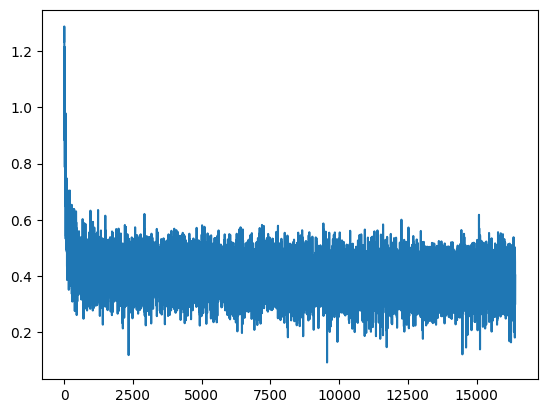

In [67]:
plt.plot(batches, losses_b)

In [78]:
loss

tensor(2.4600, grad_fn=<NllLossBackward0>)

In [79]:
tot_loss = 0
for batch in dev_dl:
    xb, yb = batch
    preds = model(xb)
    loss = F.cross_entropy(preds, yb)
    tot_loss += loss.item()

print(f"Avg dev loss: {tot_loss / len(dev_dl)}")

Avg dev loss: 2.302677301286954


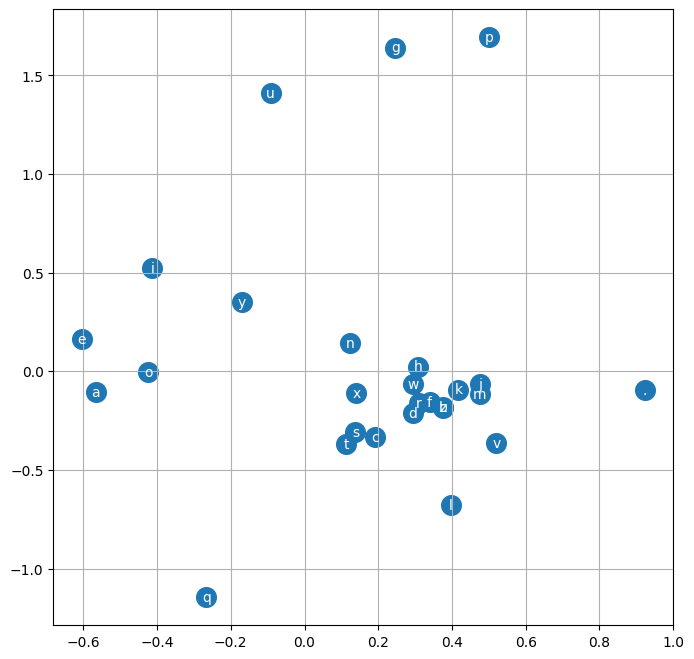

In [80]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# vowels are clustered, especially aeio
# .is totally separate
# Model has learned these patterns via embedding
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

### Expanding params

In [282]:
# Hyperparameters
embedding_size = 20
hidden_neurons = 200
batch_size = 16

In [283]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True, generator=g)
dev_dl = DataLoader(dev_data, batch_size=batch_size, shuffle=True, generator=g)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=True, generator=g)

In [284]:
# Separate param initialization
C = torch.randn((len(letters) + 1, embedding_size), generator=g)
# is num chars we picked per group
W1 = torch.randn(3*embedding_size, hidden_neurons, generator=g)
B1 = torch.randn(hidden_neurons, generator=g)
W2 = torch.randn(hidden_neurons, len(letters) + 1, generator=g)
B2 = torch.randn(len(letters) + 1, generator=g)
parameters = [C, W1, B1, W2, B2]

In [285]:
for p in parameters:
    p.requires_grad = True

In [286]:
# Total model size
sum(p.nelement() for p in parameters)

18167

In [287]:
def model(xb: torch.Tensor):
    emb = C[xb].view(-1, 3*embedding_size)
    h = torch.tanh((emb @ W1) + B1)
    return (h @ W2) + B2

In [288]:
losses_b = []
batches = []

batch_i = 0

In [289]:
for i in range(20):
    for batch in train_dl:
        xb, yb = batch
        preds = model(xb)
        loss = F.cross_entropy(preds, yb)

        for p in parameters:
            p.grad = None
        loss.backward()

        lr = 0.1
        if i > 5 and i < 10:
            lr = 0.01
        if i >= 10 and i < 15:
            lr = 0.001
        if i >= 15:
            lr = 0.0005
        for p in parameters:
            p.data -= lr * p.grad

        losses_b.append(loss.log10().item())
        batches.append(batch_i)
        batch_i += 1

Train loss: 2.4385437965393066
Avg dev loss: 2.102236957926499


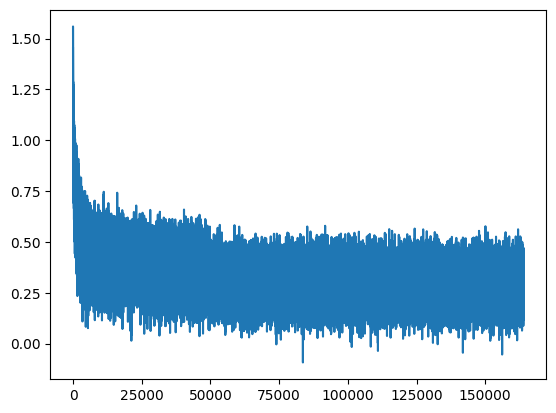

In [290]:
print(f"Train loss: {loss}")

tot_loss = 0
for batch in dev_dl:
    xb, yb = batch
    preds = model(xb)
    loss = F.cross_entropy(preds, yb)
    tot_loss += loss.item()

print(f"Avg dev loss: {tot_loss / len(dev_dl)}")

plt.plot(batches, losses_b)

Best dev loss:

2.200
embedding_size = 10
hidden_neurons = 200
batch_size = 64

2.11
embedding_size = 10
hidden_neurons = 200
batch_size = 16

2.1022
embedding_size = 20
hidden_neurons = 200
batch_size = 16

In [295]:
words_to_gen = 20
for wi in range(words_to_gen):
    li = 0
    next_letter = ''
    genned_word = '...'
    while next_letter != '.' and len(genned_word) < 20:
        prior_group = []
        prior_group.append(stoi[genned_word[li]])
        prior_group.append(stoi[genned_word[li+1]])
        prior_group.append(stoi[genned_word[li+2]])

        probs = F.softmax(model(torch.tensor(prior_group)), dim=1)
        pred = torch.multinomial(probs, 1, replacement=True, generator=g).item()
        next_letter = itos[int(pred)]

        genned_word += next_letter
        li += 1
    print(genned_word.strip('.'))

fianne
fxxelisson
fzoretaj
fianna
fyse
qqqeylond
fxila
fylenogjton
qqqeysie
ydane
qqqewy
fza
fyfancie
fynn
fxansh
cdaiya
yden
qqqeerayce
fzyenae
fylia


In [310]:
[0] * 3

[0, 0, 0]

In [323]:
itos[20] + itos[1]

'ta'

In [326]:
for _ in range(20):
    
    out = []
    context = [0, 20, 1] # initialize
    while True:
      probs = F.softmax(model(torch.tensor([context])), dim=1)
      ix = torch.multinomial(probs, 1, replacement=True, generator=g).item()  
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mot.
yriel.
im.
mia.
iah.
mandran.
h.
igula.
yvi.
yacoby.
dijeylah.
ylenn.
tlius.
chi.
ysolardaw.
v.
daydyn.
dyowecfanvan.
rvin.
irsh.
